![title](https://pythonawesome.com/content/images/2018/05/scikit-learn.png)

In [1]:
# Import libraries we will need in the following
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn import linear_model

# Regression

In statistics, several methods to search for relationships among variables goes under the name of __regression__.

## Linear Regression

[Linear regression](https://en.wikipedia.org/wiki/Linear_regression) is a linear approach to determine relationship between two or more quantities.

For example, we want to study the trend of fuel consumption as a function of the engine capacity, we can collect our measures in a table like the following.

| Engine capacity (cm$^3$) | Average Consumption (l/100km) |
|---|----|
| $800$  |  $6$    | 
| $1000$ |  $7.5$  | 
| $1100$ |  $8$    | 
| $1200$ |  $8.7$  | 
| $1600$ |  $12.4$ | 
| $2000$ |  $16$   | 
| $3000$ |  $20$   | 
| $4500$ |  $28$   | 
| $\ldots$ |  $\ldots$ |

Let's transform this into a pandas dataframe for practical purposes.

In [2]:
# complete
measures =  pd.DataFrame({'Consumption_avg': [6, 7.5, 8, 8.7, 12.4, 16, 20, 28], 
                         'Capacity': [800, 1000, 1100, 1200, 1600, 2000, 3000, 4500]})

In [3]:
measures

,Capacity,Consumption_avg
0,800,6.0
1,1000,7.5
2,1100,8.0
3,1200,8.7
4,1600,12.4
5,2000,16.0
6,3000,20.0
7,4500,28.0


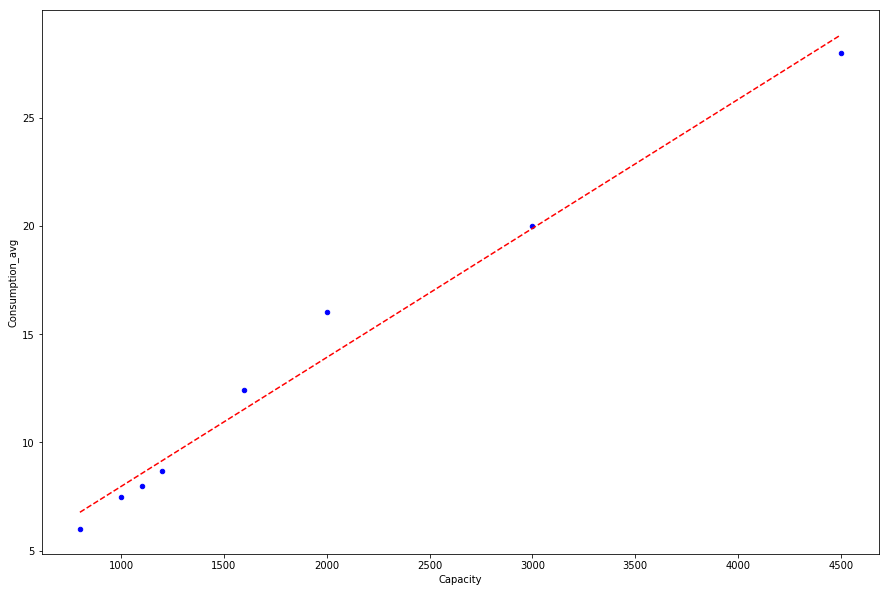

In [4]:
measures.plot(kind='scatter', x = 'Capacity', y = 'Consumption_avg', color='blue', figsize=(15,10))

# Insert a trend line
x = measures.Capacity
y = measures.Consumption_avg
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x, p(x), "r--")
plt.show()

One can easily see there is a linear trend in our data.

Apply linear regression to find the average consuption of an engine with `test_capacity = 1800`.
Recall you have to reshape X to take into account the intercept terms.

In [5]:
# complete

# reshaping of X
X = np.ones((len(x), 2))
X[:,1] = x

In [6]:
test_capacity = 1800
# complete
model = linear_model.LinearRegression()
model.fit(X, y)

X_test = np.array([1, test_capacity]).reshape(1, -1)

prediction = model.predict(X_test)


print('Your predicted consumption: %.10f' %prediction)
print('You should get approximatively: 12.73')

Your predicted consumption: 12.7292780749
You should get approximatively: 12.73


### Feature normalisation

Let's take the functions you defined in the previous notebook for gradient descent and make them run on these data.

In [7]:
# parameters 
max_iterations = 1500 
alpha = 0.01 # learing rate

# adding initial β = (0,0)
beta = np.zeros(2)

In [8]:
def computeCost(X, y, beta):
    """
        (array of float, array of float, array of float) -> float
        
        :return: the value of squared-difference cost function.
    """
    n = len(y)
    cost = np.dot((np.dot(X,beta) - y ), (np.dot(X,beta) - y ))/(2*n) # complete here
    return cost

Let's see the value of the cost function

In [9]:
print('Your computed cost: %.10f' %computeCost(X,y,beta))
print('You should get approximatively: 114.106')

Your computed cost: 114.1062500000
You should get approximatively: 114.106


In [10]:
# Gradient descent algorithm
def gradientDescent(X, y, beta, alpha, max_iterations, cost_thr = 1e-5):
    """
        (array of float, array of float, float, int, [float]) -> array of float, array of float, float
        
        :return: the following tuple:
            - array of parameters beta
            - array of beta[1] for each step
            - cost function
    """
    
    n = len(y)
    # cost = np.zeros(max_iterations)
    cost = []
    betaMod = beta.copy()
    # betaHist = np.zeros(max_iterations)
    beta0Hist = []
    beta1Hist = []
    
    for i in range(max_iterations):                                             # complete here (the student has to write 
        betaMod = betaMod - (np.dot(X.T, (np.dot(X, betaMod) - y)) * alpha) / n # down this for-loop)
        beta0Hist.append(betaMod[0])
        beta1Hist.append(betaMod[1])        
        # cost[i] = computeCost(X, y, betaMod)
        cost.append(computeCost(X, y, betaMod))
        if cost[i] < cost_thr:
            break
        if i > 0 and (abs(cost[i] - cost[i-1])/cost[i] < cost_thr):
            break
        
    cost = np.array(cost)
    beta0Hist = np.array(beta0Hist)
    beta1Hist = np.array(beta1Hist)
    betaHist = [beta0Hist, beta1Hist]
    
    return betaMod, betaHist, cost, i

In [11]:
betaFit, betaHist, cost, iterations = gradientDescent(X, y, beta, alpha, max_iterations)  

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in subtract


You can see there is something weird going on. Some warnings appeared.

Let's plot $J(\beta)$ as function of $\beta_1$ and of iteration number.

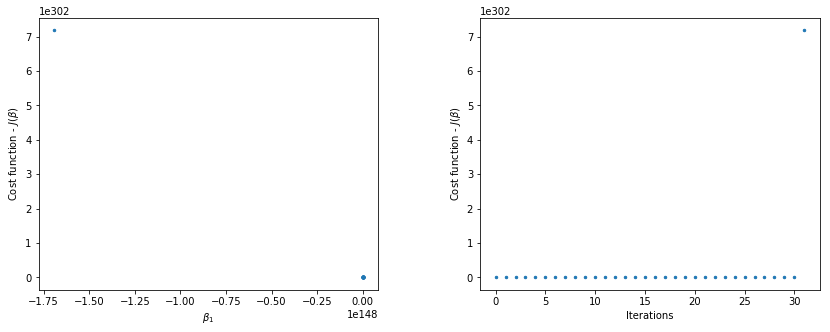

In [12]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Minimization path:
ax1.scatter(betaHist[1], cost,  marker='o', s=6)
ax1.set_xlabel(r'$\beta_1$')
ax1.set_ylabel(r"Cost function - $J(\beta)$");

# Cost-Iterations plot:
ax2.scatter(np.arange(len(cost)), cost,  marker='o', s=6)
ax2.set_xlabel("Iterations")
ax2.set_ylabel(r"Cost function - $J(\beta)$");

Definitely, this is not right.

Let's try to make predictions and verify the error.

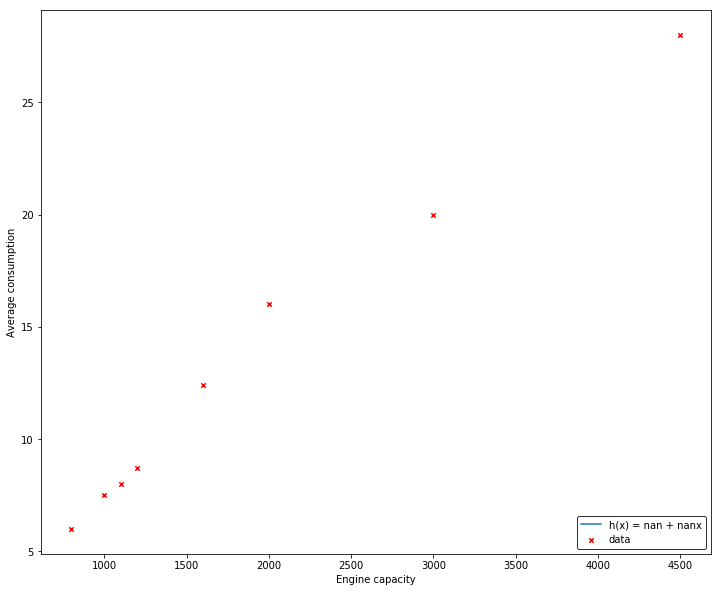

In [13]:
def linearFit(value):
    return betaFit[0] + betaFit[1] * value

plt.rcParams["figure.figsize"] = 12, 10
plt.scatter(X[:,1], y, marker='x', c='r', s=20, label='data')
plt.plot(X[:, 1], linearFit(X[:, 1]), label='h(x) = %0.2f + %0.2fx'%(betaFit[0], betaFit[1]))
plt.xlabel("Engine capacity")
plt.ylabel("Average consumption")
pst = plt.legend(loc='lower right', frameon=True)
pst.get_frame().set_edgecolor('k');

In [14]:
# make prediction
linFit = linearFit(test_capacity)

In [15]:
print('Your predicted consumption with sklearn: %.10f' %prediction)
print('Your predicted consumption with your linearFit: %.10f' %linFit)
print('You should get approximatively: 12.73')

Your predicted consumption with sklearn: 12.7292780749
Your predicted consumption with your linearFit: nan
You should get approximatively: 12.73


It is clear we have a problem in our method.
As confirmed by NaN value, we got for prediction and for relative error.

In [16]:
print('Relative error: %.2f%%' %(abs(prediction - linFit)*100/prediction))

Relative error: nan%


The reason of this weird behaviour is the great difference between ranges of variables.

Indeed, the engine capacity varies in a range

* $x \in [800, 4500] $

while, the average consumption data belongs to a completely different interval of values

* $y \in [6, 28] $

In Machine Learning literature, people overcome this issue with a tecnique called __feature normalisation__.

Briefly, we rescale our data such that $x$ and $y$ vary more or less in the same range.

This is done by the following redefinition

- $x = \frac{x - \mu}{\sigma_x}$

These redefinitions make variables range centered in zero.

In [17]:
mu = np.mean(x)
sigma = np.std(x)

mu_y = np.mean(y)
sigma_y = np.std(y)

In [18]:
x_rescaled = (x - mu)/sigma # Normalisation is necessary! 

# reshaping of X_rescaled
X_rescaled = np.ones((len(x_rescaled), 2))
X_rescaled[:,1] = x_rescaled

In [19]:
y_rescaled = (y - mu_y)/sigma_y

Let's now retry to exectute gradient descent.

In [20]:
# re-initialise parameters 
max_iterations = 1500 
alpha = 0.01 # learing rate

# adding initial β = (0,0)
beta = np.zeros(2)

Calculate quantities

In [21]:
betaFit, betaHist, cost, iterations = gradientDescent(X_rescaled, y_rescaled, beta, alpha, max_iterations)  

No more nasty warnings.

Let's proceed with plots and printing results.

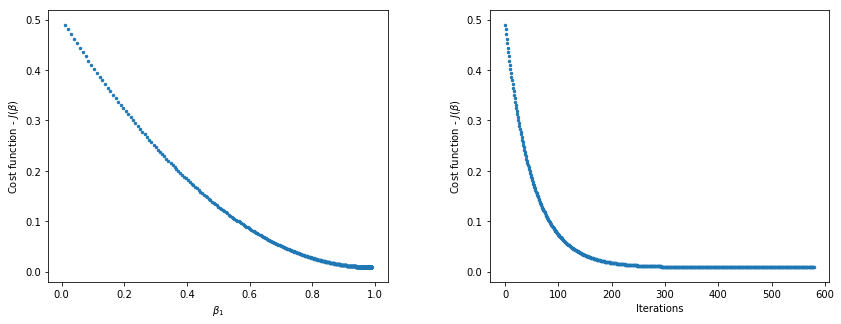

In [22]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Minimization path:
ax1.scatter(betaHist[1], cost,  marker='o', s=6)
ax1.set_xlabel(r'$\beta_1$')
ax1.set_ylabel(r"Cost function - $J(\beta)$");

# Cost-Iterations plot:
ax2.scatter(np.arange(len(cost)), cost,  marker='o', s=6)
ax2.set_xlabel("Iterations")
ax2.set_ylabel(r"Cost function - $J(\beta)$");

It definitely looks better now.

Let's try to make predictions and verify the error.

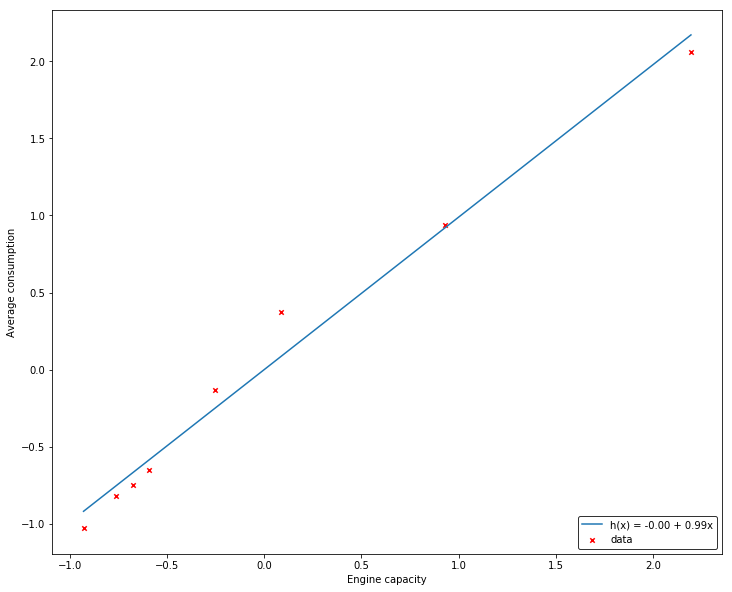

In [23]:
plt.rcParams["figure.figsize"] = 12, 10
plt.scatter(X_rescaled[:,1], y_rescaled, marker='x', c='r', s=20, label='data')
plt.plot(X_rescaled[:, 1], linearFit(X_rescaled[:, 1]), label='h(x) = %0.2f + %0.2fx'%(betaFit[0], betaFit[1]))
plt.xlabel("Engine capacity")
plt.ylabel("Average consumption")
pst = plt.legend(loc='lower right', frameon=True)
pst.get_frame().set_edgecolor('k');

In [24]:
# make prediction
test_capacity_rescaled = abs(test_capacity - mu)/sigma
linFit_rescaled = linearFit(test_capacity_rescaled)
linFit = mu_y - (linFit_rescaled*sigma_y)

In [25]:
print('Your predicted consumption with sklearn: %.10f' %prediction)
print('Your predicted consumption with your linearFit: %.10f' %linFit)
print('You should get approximatively: 12.73')

Your predicted consumption with sklearn: 12.7292780749
Your predicted consumption with your linearFit: 12.7310297616
You should get approximatively: 12.73


Definitely better!

To conclude let's calculate the relative error

In [26]:
print('Relative error: %.2f%%' %(abs(prediction - linFit)*100/prediction))

Relative error: 0.01%


We can be satisfied!

__Why feature normalisation is not necessary in `sklearn`?__

Well, this is one of the reasons why it is useful make use of libraries. `sklearn` contains a lot of cool methods taking care of performing the right normalisation when necessary.

In general libraries are faster, more stable and robust than hand-made code. For these reasons, we are going to use use them widely in the next applications. However, it might be useful to understand how a minimisation algorithm works to gain sensibility to possible data-related issues.

## Excercise

Linear regression with multiple variables.

Implement the multivariable linear regression.

__Note__: the `gradientDescent` function we wrote automatically takes into account multi-dimensional parameters $\beta$.

In [27]:
# load data and unpack x1, x2, y
data = pd.read_csv('Data/LinearReg/data2.txt', header= None)
data.columns = ['Size of the house', 'Number of bedrooms', 'Price']

In [28]:
x1 = data['Size of the house']
x2 = data['Number of bedrooms']
y = data['Price']

x = np.column_stack([x1, x2])

Let's start by plotting features to determine whether feature normalisation is necessary.

__spoiler alert__: YES!

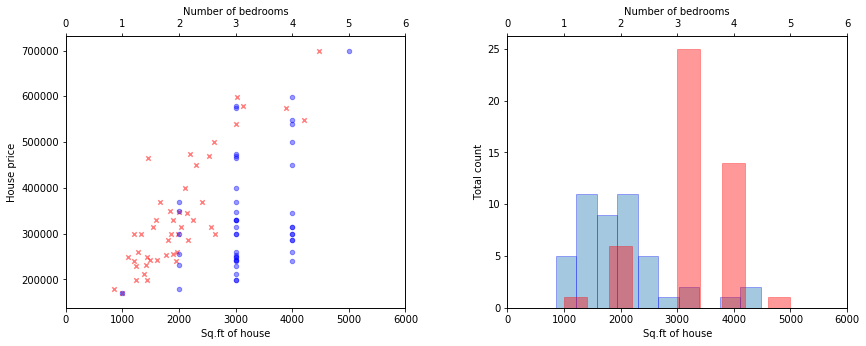

In [29]:
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Scatter plots:
ax1.scatter(x[:,0], y, marker='x', c='r', alpha=0.5, s=20)
ax1.set_xlabel('Sq.ft of house')
ax1.set_ylabel('House price')
ax1.set_xlim(0, 6000)

ax3 = ax1.twiny()
ax3.scatter(x[:,1], y, marker='o', c='b', alpha=0.4, s=20)
ax3.set_xlabel('Number of bedrooms')
ax3.set_xlim(0, 6)

# Histograms:
ax2.hist(x[:,0], alpha=0.4, edgecolor='b', linewidth=0.8)
ax2.set_xlabel('Sq.ft of house')
ax2.set_ylabel('Total count')
ax2.set_xlim(0, 6000)

ax4 = ax2.twiny()
ax4.hist(x[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8)
ax4.set_xlabel('Number of bedrooms')
ax4.set_xlim(0, 6);

Defining the feature normalization function:

In [30]:
def featureNormalize(X):    
    # mean and std. deviation:
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [31]:
X_norm, mean, sigma = featureNormalize(x)

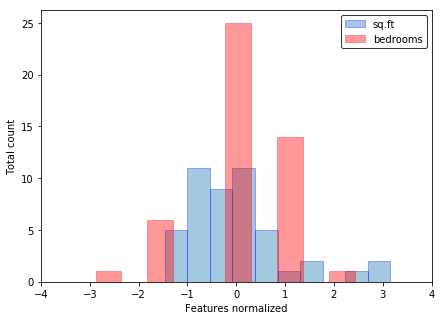

In [32]:
fig = plt.figure(figsize=(7, 5))

# Histograms:
plt.hist(X_norm[:,0], alpha=0.4, edgecolor='b', linewidth=0.8, label='sq.ft')
plt.hist(X_norm[:,1], alpha=0.4, color='r', edgecolor='r', linewidth=0.8, label='bedrooms')
plt.xlabel('Features normalized')
plt.ylabel('Total count')
plt.xlim(-4, 4)
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

In [33]:
X = np.hstack((np.ones((x.shape[0],1)), x)) # Recall we have to add the 1 column to X array.
X_norm = np.hstack((np.ones((X_norm.shape[0],1)), X_norm)) # Recall we have to add the 1 column to X array.

We can now add $\beta$ and calculate the gradient descent for multi parameters:

In [34]:
# initialising β
beta = np.zeros(3)

# calculating gradient descent
betaFit, betaHist, cost, iterations = gradientDescent(X_norm, y, beta, alpha, max_iterations)

In [35]:
print('Your calculated values: %.5f, %.5f, %.5f' %(betaFit[0], betaFit[1], betaFit[2]) )
print('You should obtain approximatively these parameter values: 340204, 107188, -4320' )

Your calculated values: 340203.96607, 107188.40576, -4319.93397
You should obtain approximatively these parameter values: 340204, 107188, -4320


### Learning rates

Testing multiple learning rates, and plotting the cost for each learning rate per the iterations:

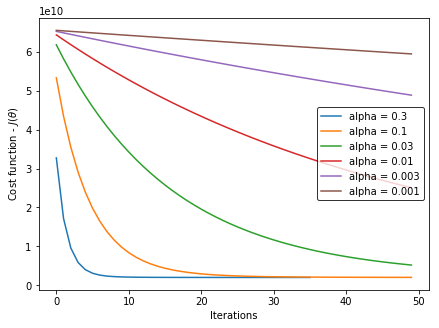

In [36]:
learningRates = [0.3, 0.1, 0.03, 0.01, 0.003, 0.001]

fig, ax = plt.subplots(figsize=(7, 5))

for alpha in learningRates:
    betaFitNew, betaHistNew, costNew, iterations = gradientDescent(X_norm, y, beta, alpha, max_iterations=50) 
    
    ax.plot(costNew, label='alpha = {0}'.format(alpha))

ax.set_ylabel(r"Cost function - $J(\theta)$")
ax.set_xlabel('Iterations')
pst = plt.legend(loc='best', frameon=True)
pst.get_frame().set_edgecolor('k');

__Answer__: The learning rate making the algorithm converge earlier (with less iterations) is $\alpha = 0.3$.

### Predict and compare

Now use a test house of $1650$ ft$^2$ and $3$ bedroom, compare your prediction with `sklearn`.

In [37]:
test_house = [1650, 3] # 3 bedroom / 1650 sqft house 

In [38]:
# GRADIENT DESCENT and FEATURE NORMALISATION
#
# running the gradient descent algorithm with best learning rate:
betaFit, betaHist, cost, iterations = gradientDescent(X_norm, y, beta, 0.03, 500)  

# normalizing the parameters:
paramsNorm = (np.array(test_house) - mean) / sigma

# adding first column of ones
params = np.hstack((np.array([1]), paramsNorm))

# predicting a house price
predict = np.dot(betaFit, params)
print('A 3 bedroom / 1650 sqft house has an expected cost of about $293311')
print('Your calculated prediction for a 3 bedroom / 1650 sqft house cost is: $%0.2f' % predict)

A 3 bedroom / 1650 sqft house has an expected cost of about $293311
Your calculated prediction for a 3 bedroom / 1650 sqft house cost is: $293310.71


In [44]:
# SKLEARN LIBRARY
#
model = linear_model.LinearRegression()
model.fit(x, y)

skprediction = model.predict(np.array(test_house).reshape(1, -1))

print('sklearn predicts a price for such a house of $%0.3f' %skprediction)
print('The cost you should obtain is about $293081')

sklearn predicts a price for such a house of $293081.464
The cost you should obtain is about $293081
